# Homework #3
---
Student Name: Sam Crane

Student ID: 801101091

GitHub: https://github.com/samofuture/Intro-to-ML

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Format

In [133]:
df = pd.read_csv('diabetes.csv')

X = df.iloc[:, 0:7].values
Y = df.iloc[:, 8].values

#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [134]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

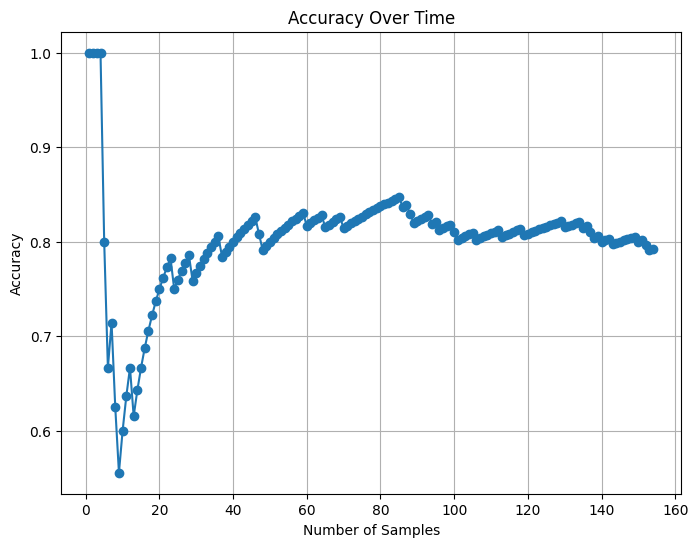

In [135]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, Y_train)

n_samples = len(Y_test)
accuracies_over_time = []

for i in range(1, n_samples + 1):
    y_pred = classifier.predict(X_test[:i])
    accuracy = accuracy_score(Y_test[:i], y_pred)
    accuracies_over_time.append(accuracy)

# Create a graph to visualize accuracy over time
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_samples + 1), accuracies_over_time, marker='o')
plt.xlabel("Number of Samples")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Time")
plt.grid(True)
plt.show()

In [136]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[90,  7],
       [25, 32]])

In [137]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
f1_score =  2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.7922077922077922
Precision: 0.8205128205128205
Recall: 0.5614035087719298
F1 Score: 0.6666666666666666


Text(0.5, 427.9555555555555, 'Predicted label')

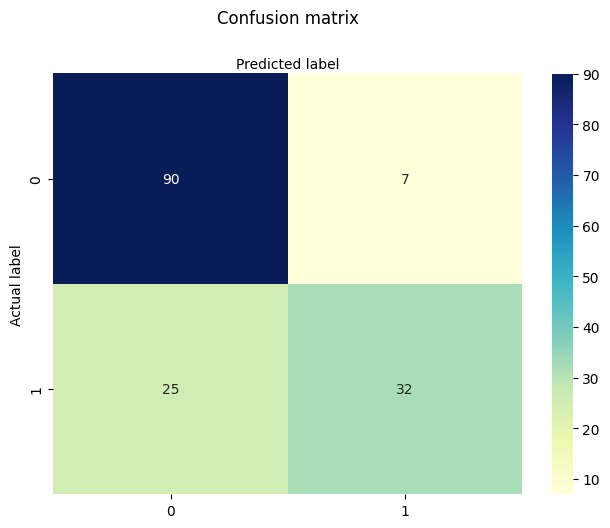

In [138]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')